In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#Run a linear regression model on PCA_Dataset_With_Mean and GoogleTrendsTimelineCleaned
#load data
pca_dataset = pd.read_csv('./Data/PCA_Dataset_With_Mean.csv',index_col = 0)
gtrends = pd.read_csv('./Data/GoogleTrendsTimelineCleaned.csv', index_col=0)

In [3]:
pca_dataset.index = pd.to_datetime(pca_dataset.index)
gtrends.index = pd.to_datetime(gtrends.index)


In [4]:
pca_dataset = pd.DataFrame(pca_dataset['PCA_mean'])
pca_dataset

,PCA_mean
Date,
2018-10-07,1.205377
2018-10-14,2.077193
2018-10-21,1.376956
2018-10-28,0.864625
2018-11-04,0.967327
...,...
2021-05-02,5.596290
2021-05-09,5.546458
2021-05-16,3.392458


In [5]:
gtrends.index.rename('Date', inplace = True)
gtrends

,Cryptocurrency,Bitcoin,Ethereum,Bitcoin Cash,Dogecoin
Date,,,,,
2018-10-07,2,8,1,0,0
2018-10-14,2,9,1,0,0
2018-10-21,2,8,1,0,0
2018-10-28,2,8,1,0,0
2018-11-04,2,8,1,1,0
...,...,...,...,...,...
2021-05-02,26,35,18,1,35
2021-05-09,31,43,20,1,35
2021-05-16,30,74,18,1,16


In [6]:
trends_price = gtrends.merge(pca_dataset, on='Date', left_index = True)

In [19]:
trends_price

,Cryptocurrency,Bitcoin,Ethereum,Bitcoin Cash,Dogecoin,PCA_mean
Date,,,,,,
2018-10-07,2,8,1,0,0,1.205377
2018-10-14,2,9,1,0,0,2.077193
2018-10-21,2,8,1,0,0,1.376956
2018-10-28,2,8,1,0,0,0.864625
2018-11-04,2,8,1,1,0,0.967327
...,...,...,...,...,...,...
2021-05-02,26,35,18,1,35,5.596290
2021-05-09,31,43,20,1,35,5.546458
2021-05-16,30,74,18,1,16,3.392458


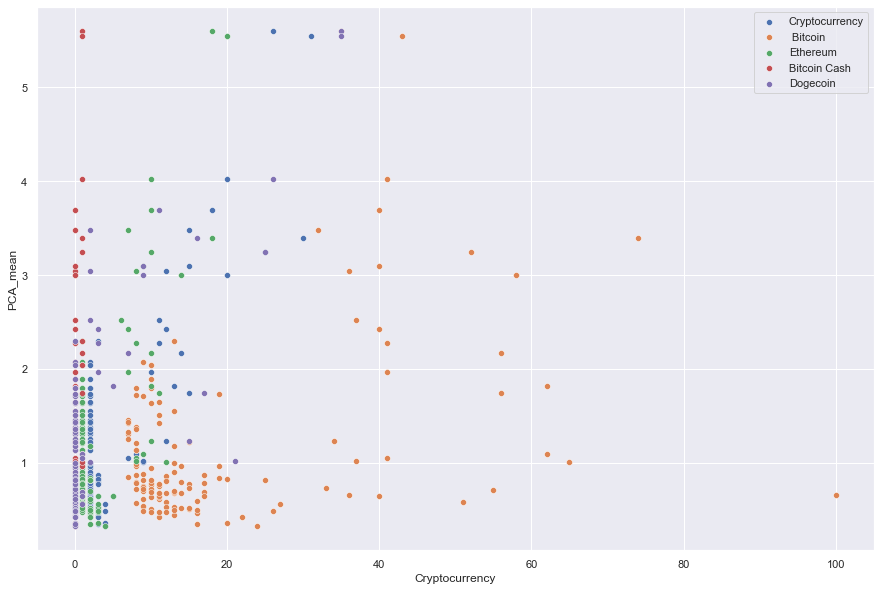

In [7]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x=trends_price['Cryptocurrency'],y=trends_price['PCA_mean'])
sns.scatterplot(x=trends_price['Bitcoin'],y=trends_price['PCA_mean'])
sns.scatterplot(x=trends_price['Ethereum'],y=trends_price['PCA_mean'])
sns.scatterplot(x=trends_price['Bitcoin Cash'],y=trends_price['PCA_mean'])
sns.scatterplot(x=trends_price['Dogecoin'],y=trends_price['PCA_mean'])
plt.legend(labels=['Cryptocurrency',' Bitcoin','Ethereum','Bitcoin Cash','Dogecoin'])
plt.show()

[Text(0, 0.5, 'Cryptocurrency'),
 Text(0, 1.5, 'Bitcoin'),
 Text(0, 2.5, 'Ethereum'),
 Text(0, 3.5, 'Bitcoin Cash'),
 Text(0, 4.5, 'Dogecoin')]

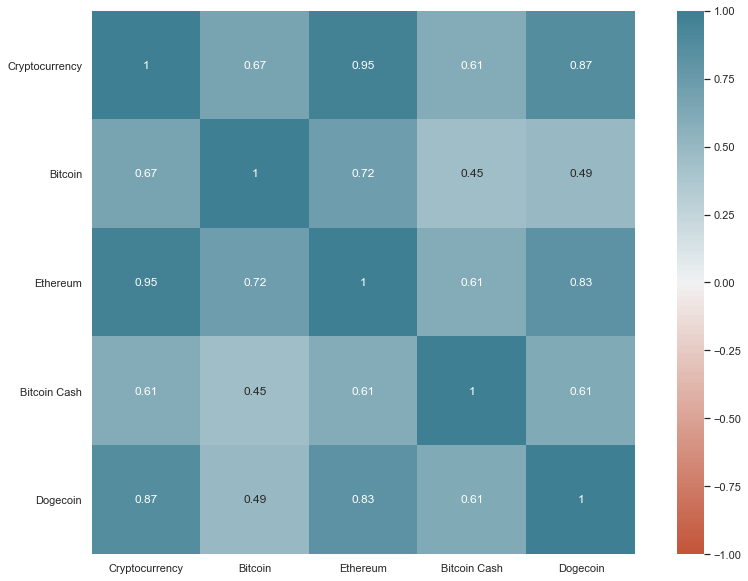

In [47]:
#Check for colinearity in google trends dataset

corr = gtrends.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation =0)

In [ ]:
#This data is highly correlated. We need to decorrelate these columns. 
#Task 1 - how to decorrelate?

In [111]:
#Create Train Test Spilt

X = trends_price.drop('PCA_mean',axis = 1)
y = trends_price['PCA_mean']

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.3, shuffle = True)

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform (X_test)

In [113]:
reg = LinearRegression()
model = reg.fit(X_train,y_train)

r_sq = reg.score(X_train, y_train)
print('coefficient of determination:', r_sq)

y_pred=reg.predict(X_test)

coefficient of determination: 0.7148413883523312


Our model is about 80.5% accurate

In [114]:
y_pred

array([0.98878438, 0.94293578, 1.98598345, 1.08580047, 0.97044494,
       0.97044494, 1.05212296, 0.72286249, 0.5486378 , 0.96127522,
       0.93376606, 0.9521055 , 0.97044494, 2.21346768, 0.92459634,
       2.52280094, 2.87829915, 0.91542661, 1.00627436, 0.9334732 ,
       0.97961466, 0.91542661, 0.9521055 , 0.97044494, 1.03378352,
       0.94293578, 0.83256251, 0.96127522, 1.21366371, 0.96127522,
       0.98878438, 1.01459462, 0.94293578, 0.97961466, 0.89708717,
       5.13491586, 1.85337819, 1.06961294, 0.93376606, 0.9787652 ,
       1.05064403, 0.94293578])

In [115]:
print("The MSE is: {}".format(mean_squared_error(y_test, y_pred)))
print('The MAE is: {}'.format(mean_absolute_error(y_test, y_pred)))

The MSE is: 0.18108603017701913
The MAE is: 0.33712800900693224


From the MAE, on average our prediction is about 0.40 off from the true value

In [120]:
#Cross Validate
#Task 2 - Am i doing this wrong?
score = cross_val_score(model,X,y,cv=5, scoring = 'r2')
print('Cross-validated scores: {}'.format(score))

Cross-validated scores: [ -2.83801893 -28.0903595   -0.14097922 -11.94967241 -26.32567794]


In [30]:
import statsmodels.api as sm

X2 = sm.add_constant(X)

regstats = sm.OLS(y,X2)
stats= regstats.fit()
pred = stats.predict()

In [31]:
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PCA_mean   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     79.77
Date:                Mon, 16 Aug 2021   Prob (F-statistic):           2.57e-38
Time:                        00:46:44   Log-Likelihood:                -87.935
No. Observations:                 139   AIC:                             187.9
Df Residuals:                     133   BIC:                             205.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6970      0.066     10.559      0.000       0.566       0.828
Cryptocurrency     0.2116      0.027      7.707      0.000       0.157       0.266
Bitcoin           -0.0114      0.004     -3.105      0.002      -0.019      -0.004
Ethereum          -0.0949      0.039     -2.447      0.016      -0.172      -0.018
Bitcoin Cash       0.2636      0.184      1.436      0.153      -0.099       0.627
Dogecoin          -0.0014      0.015     -0.095      0.924      -0.030       0.027
==============================================================================
Omnibus:                        5.996   Durbin-Watson:                   0.829
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                5.809
Skew:                           0.379   Prob(JB):                       0.0548
Kurtosis:                       3.655   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""